In [4]:
# 数据规整化：清理、转换、合并和重塑

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 数据库风格的DataFrame合并

In [6]:
df1 = DataFrame({
    'key': list('bbacaab'),
    'data1': range(7)
})

In [7]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [8]:
df2 = DataFrame({
    'key': list('abd'),
    'data2': range(3)
})

In [9]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [10]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [11]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [18]:
df3 = DataFrame({
    'lkey': list('bbacaab'),
    'data1': range(7)
})

In [21]:
df4 = DataFrame({
    'rkey': list('abd'),
    'data2': range(3)
})

In [19]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [22]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [25]:
# 默认情况下，merge做的试“inner”连接；其他还有“left”，”right"以及“outer"连接
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [26]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [27]:
df1 = DataFrame({
    'key': list('bbacab'),
    'data1': range(6)
})

In [28]:
df2 = DataFrame({
    'key': list('ababd'),
    'data2': range(5)
})

In [29]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [30]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [31]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [32]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [5]:
left = DataFrame({
    'key1': ['foo', 'foo', 'bar'],
    'key2': ['one', 'two', 'one'],
    'lval': [1, 2, 3]
})

In [4]:
right = DataFrame({
    'key1': ['foo', 'foo', 'bar', 'bar'],
    'key2': ['one', 'one', 'one', 'two'],
    'rval': [4, 5, 6, 7]
})

In [6]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [7]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [8]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [9]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [11]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [12]:
# 索引上的合并

In [13]:
left1 = DataFrame({
    'key': list('abaabc'),
    'value': range(6)
})

In [14]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [15]:
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [16]:
right1

,group_val
a,3.5
b,7.0


In [17]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [18]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [19]:
lefth = DataFrame({
    'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'key2': [2000, 2001, 2002, 2001, 2002],
    'data': np.arange(5)
})

In [20]:
lefth

,data,key1,key2
0,0,Ohio,2000
1,1,Ohio,2001
2,2,Ohio,2002
3,3,Nevada,2001
4,4,Nevada,2002


In [21]:
righth = DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], [2001, 2000, 2000, 2000, 2001, 2002]],
    columns=['event1', 'event2']
)

In [22]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [23]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1


In [24]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [26]:
left2 = DataFrame([[1, 2], [3, 4], [5, 6]], index=['a', 'c', 'e'], columns=['Ohio', 'Nevada'])

In [27]:
right2 = DataFrame([[7, 8], [9, 10], [11, 12], [13, 14]], index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [28]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [29]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [30]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [31]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [32]:
right1

,group_val
a,3.5
b,7.0


In [33]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [34]:
another = DataFrame([[7, 8], [9, 10], [11, 12], [16, 17]], index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [35]:
another

,New York,Oregon
a,7,8
c,9,10
e,11,12
f,16,17


In [36]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,NaN,NaN,7,8
c,3,4,9.0,10.0,9,10
e,5,6,13.0,14.0,11,12


In [37]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


In [1]:
# 轴向连接

In [3]:
arr = np.arange(12).reshape((3, 4))

In [4]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [6]:
s1 = Series([0, 1], index=['a', 'b'])

In [7]:
s1

a    0
b    1
dtype: int64

In [8]:
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])

In [9]:
s2

c    2
d    3
e    4
dtype: int64

In [10]:
s3 = Series([5, 6], index=['f', 'g'])

In [11]:
s3

f    5
g    6
dtype: int64

In [13]:
# pd.concat([s1, s3, s3], axis=0)
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [14]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [15]:
s4 = pd.concat([s1 * 5, s3])

In [17]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [18]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [19]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [21]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [22]:
# 连接轴上创建一个层次化索引

In [23]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [24]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [25]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [26]:
# 如果沿着axis=1对Series进行合并，则keys就会成为DataFrame的列头

In [27]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [28]:
# 同样的逻辑对DataFrame对象也是一样

In [29]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])

In [30]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [31]:
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['three', 'four'])

In [32]:
df2

,three,four
a,5,6
c,7,8


In [35]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [38]:
# 层次化索引/列头命名
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [39]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

In [40]:
df1

,a,b,c,d
0,-0.218325,0.366215,-1.401107,0.035596
1,-1.587783,1.853612,-1.191941,0.937668
2,-0.324950,0.787451,-0.647613,0.895841


In [41]:
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [42]:
df2

,b,d,a
0,-1.607702,-1.269048,0.651419
1,0.668469,-0.342647,0.378401


In [45]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.218325,0.366215,-1.401107,0.035596
1,-1.587783,1.853612,-1.191941,0.937668
2,-0.324950,0.787451,-0.647613,0.895841
3,0.651419,-1.607702,NaN,-1.269048
4,0.378401,0.668469,NaN,-0.342647


In [46]:
pd.concat([df1, df2], ignore_index=False)

,a,b,c,d
0,-0.218325,0.366215,-1.401107,0.035596
1,-1.587783,1.853612,-1.191941,0.937668
2,-0.324950,0.787451,-0.647613,0.895841
0,0.651419,-1.607702,NaN,-1.269048
1,0.378401,0.668469,NaN,-0.342647


In [47]:
# 合并重叠数据

In [48]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f', 'e', 'd', 'c', 'b', 'a'])

In [49]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [50]:
b = Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])

In [51]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [53]:
b[-1] = np.nan

In [56]:
# if-else: if pd.isnull[i] == True then b[i] else a[i]
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [55]:
pd.isnull(a)

f     True
e    False
d     True
c    False
b    False
a     True
dtype: bool

In [57]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [59]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [60]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [61]:
# 对于DataFrame，combine_first自然也会在列上做同样的事情，因此你可以将其看作：用参数对象中的数据为调用者对象的缺失数据“打补丁”

In [62]:
df1 = DataFrame({
    'a': [1., np.nan, 5., np.nan],
    'b': [np.nan, 2., np.nan, 6.],
    'c': range(2, 18, 4)
})

In [63]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [64]:
df2 = DataFrame({
    'a': [5., 4., np.nan, 3., 7.],
    'b': [np.nan, 3., 4., 6., 8.]
})

In [65]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [66]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 重塑和轴向旋转
有许多用于重新排列表格型数据的基础运算，这些函数也称作重塑（reshape）或轴向旋转（pivot）运算。

### 重塑层次化索引
层次化索引为DataFrame数据的重排任务提供了一种具有良好一致性的方式，主要功能有二：
* stack：将数据的列旋转为行
* unstack：将数据的行旋转为列

In [69]:
data = DataFrame(
    np.arange(6).reshape(2, 3), index=pd.Index(['Ohio', 'Colorado'], name='state'),
    columns=pd.Index(['one', 'two', 'three'], name='number')
)

In [70]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [73]:
# 使用该数据的stack方法即可将列转换为行，得到一个Series
result = data.stack()

In [72]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [74]:
# 对于一个层次化索引Series，你可以用unstack将其重排为一个DataFrame

In [75]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [76]:
# 默认情况下，unstack操作的是最内层（stack也是如此）,传入分层级别的编号或名称即可对其他级别进行unstack操作

In [77]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [78]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [79]:
result.unstack('number')

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [80]:
# 如果不是所有的级别值都能在各分组中找到的话，则unstack操作可能会引入缺失数据

In [81]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

In [82]:
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])

In [83]:
s1

a    0
b    1
c    2
d    3
dtype: int64

In [84]:
s2

c    4
d    5
e    6
dtype: int64

In [85]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [86]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [87]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [88]:
# stack默认会过滤缺失数据，因此该运算是可逆的

In [89]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [90]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [91]:
# 在对DataFrame进行unstack操作时，作为旋转轴的级别将会成为结果中的最低界别

In [93]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [94]:
df = DataFrame(
    {'left': result, 'right': result + 5},
    columns=pd.Index(['left', 'right'], name='side')
)

In [95]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [96]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [97]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [98]:
# 将“长格式”旋转为“宽格式”

In [2]:
# 数据转换

In [3]:
data = DataFrame({
    'k1': ['one'] * 3 + ['two'] * 4,
    'k2': [1, 1, 2, 3, 3, 4, 4]
})

In [4]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [5]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [6]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [7]:
data['v1'] = range(7)

In [8]:
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [9]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [12]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [13]:
# 利用函数或映射进行数据转换

In [14]:
data = DataFrame({
    'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
})

In [15]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [22]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

In [23]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [24]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [26]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [27]:
# 替换值

In [29]:
data = Series([1, -999, 2, -999, -1000, 3])

In [30]:
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [31]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [32]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [33]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [34]:
data.replace({
    -999: np.nan,
    -1000: 0
})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [35]:
# 重命名轴索引

In [36]:
data = DataFrame(
    np.arange(12).reshape(3, 4), index=['Ohio', 'Colorado', 'New Yor'],
    columns=['one', 'two', 'three', 'four']
)

In [37]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New Yor,8,9,10,11


In [38]:
data.index.map(str.upper)

Index([u'OHIO', u'COLORADO', u'NEW YOR'], dtype='object')

In [39]:
data.index = data.index.map(str.upper)

In [40]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YOR,8,9,10,11


如果想创建数据集的转换版（而不是修改原始数据），比较实用的方法是rename:

In [41]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New Yor,8,9,10,11


In [44]:
data.rename(index={'OHIO': 'INDIANA'}, columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YOR,8,9,10,11


如果希望就地修改某个数据集，传入inplace=True即可：

In [45]:
_ = data.rename(index={'OHIO': 'INDIANA'})

In [46]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YOR,8,9,10,11


In [47]:
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [48]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YOR,8,9,10,11


In [49]:
# 离散化和曲面划分

为了便于分析，连续数据常常被离散化或拆分为“面元”(bin)。假设有一组人员数据，而你希望将他们划分为不同的年龄组：

In [50]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

接下来将这些数据划分为“18-25”、“26-35”、“35-60”以及‘60以上’几个面元，要实现该功能，你需要使用pandas的cut函数：

In [51]:
bins = [18, 25, 35, 60, 100]

In [52]:
cats = pd.cut(ages, bins)

In [53]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [55]:
# cats.labels
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [56]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

跟区间的数字符号一样，圆括号表示开端，而方括号表示闭端。哪边是闭端可以通过right=False进行修改：

In [57]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

也可以设置自己的面元名称，将labels选项设置为一个列表或数组即可：

In [58]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [59]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

如果向cut传入的是面元的数量而不是确切的面元边界，则它会根据数据的最小值和最大值计算等长面元。下面这个例子中，我们将一些均匀分布的数据分成四组：

In [64]:
data = np.random.rand(20)

In [65]:
data

array([0.65851755, 0.15478867, 0.09899633, 0.64009307, 0.64808547,
       0.54995126, 0.05583326, 0.57791049, 0.69088281, 0.11960752,
       0.11952404, 0.67215754, 0.48633581, 0.64850164, 0.45967017,
       0.57598073, 0.69374633, 0.07035599, 0.70098041, 0.98316916])

In [66]:
pd.cut(data, 4, precision=2)

[(0.52, 0.75], (0.055, 0.29], (0.055, 0.29], (0.52, 0.75], (0.52, 0.75], ..., (0.52, 0.75], (0.52, 0.75], (0.055, 0.29], (0.52, 0.75], (0.75, 0.98]]
Length: 20
Categories (4, interval[float64]): [(0.055, 0.29] < (0.29, 0.52] < (0.52, 0.75] < (0.75, 0.98]]

qcut是一个非常类似于cut的函数，它可以根据样本分位数对数据进行面元划分。根据数据的分布情况，
cut可能无法使各个面元中含有相同数量的数据点，而qcut由于使用的是样本分位数，因此可以得到大小基本相等的面元：

In [67]:
data = np.random.randn(1000)

In [68]:
cats = pd.qcut(data, 4)

In [69]:
cats

[(-0.667, -0.0578], (-0.0578, 0.597], (-3.929, -0.667], (-3.929, -0.667], (-3.929, -0.667], ..., (0.597, 2.959], (-0.667, -0.0578], (0.597, 2.959], (0.597, 2.959], (-0.667, -0.0578]]
Length: 1000
Categories (4, interval[float64]): [(-3.929, -0.667] < (-0.667, -0.0578] < (-0.0578, 0.597] < (0.597, 2.959]]

In [71]:
pd.value_counts(cats)

(0.597, 2.959]       250
(-0.0578, 0.597]     250
(-0.667, -0.0578]    250
(-3.929, -0.667]     250
dtype: int64

In [73]:
len(cats.codes)

1000

跟cut一样，也可以设置自定义的分位数（0到1之间的数值，包含端点）：

In [75]:
cats2 = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1])

In [76]:
pd.value_counts(cats2)

(-0.0578, 1.218]     400
(-1.311, -0.0578]    400
(1.218, 2.959]       100
(-3.929, -1.311]     100
dtype: int64

In [77]:
# 检测和过滤异常值

异常值（outlier）的过滤或变换运算在很大程度上其实就是数组运算，来看一个含有正态分布数据的DataFrame:

In [2]:
np.random.seed(12345)

In [3]:
data = DataFrame(np.random.randn(1000, 4))

In [4]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [5]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [6]:
col = data[3]

In [7]:
col

0     -0.555730
1      0.281746
2     -1.296221
3      0.886429
4     -0.438570
5     -1.021228
6      0.523772
7     -0.831154
8      0.560145
9      0.332883
10    -0.970736
11    -0.753887
12     0.246674
13    -0.919262
14    -0.660524
15     0.670216
16    -2.304234
17     1.074623
18    -0.503087
19     0.222896
20     0.433610
21     0.850591
22     2.169461
23     0.795253
24     0.152677
25    -0.929006
26     0.980928
27     0.457002
28    -0.402827
29    -1.648985
         ...   
970   -1.460094
971    0.132262
972   -1.091849
973   -1.243078
974   -0.521155
975   -0.307670
976    1.381155
977    0.075798
978    0.102469
979    1.120895
980   -0.285176
981    0.053410
982    0.233619
983    0.604880
984   -0.335099
985    1.367213
986   -0.512542
987   -1.050942
988   -0.387002
989    1.642339
990    1.336648
991    0.153988
992   -1.466596
993    1.101972
994    0.604072
995    1.653126
996   -1.502870
997    0.133304
998   -0.303340
999    0.882755
Name: 3, Length: 1000, d

In [8]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

要选出全部含有“超过3或-3的值”的行，你可以利用布尔型DataFrame以及any方法：

In [14]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


根据这些条件，即可轻松地对值进行设置，下面的代码可以将值限制在区间-3到3以内：

In [15]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [16]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.000000,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [17]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


In [18]:
# 排列和随机采样

In [19]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

In [20]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [22]:
sampler = np.random.permutation(5)

In [23]:
sampler

array([1, 0, 2, 3, 4])

然后就可以在基于ix（loc）的索引操作或take函数中使用该数组了：

In [24]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [25]:
len(df)

5

In [26]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [42]:
df.take(np.array([1, 0, 4]))

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19


In [43]:
bag = np.array([5, 7, -1, 6, 4])

In [44]:
bag

array([ 5,  7, -1,  6,  4])

In [47]:
sampler = np.random.randint(0, len(bag), size=10)

In [48]:
sampler

array([3, 0, 4, 1, 1, 2, 3, 0, 1, 2])

In [49]:
draws = bag.take(sampler)

In [50]:
draws

array([ 6,  5,  4,  7,  7, -1,  6,  5,  7, -1])

In [51]:
# 计算指标/哑变量

另一种常用于统计建模或机器学习的转换方式是：将分类变量（categories variable）转换为“哑变量矩阵”（dummy matrix）或“指标矩阵”（indicator matrix）。
如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）、pandas有一个get_dummies函数可以实现该功能（其实自己动手做一个也不难）。
拿之前的一个例子来说：

In [2]:
df = DataFrame({
    'key': ['b', 'b', 'a', 'c', 'a', 'b'],
    'data1': range(6)
})

In [3]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [4]:
df['key']

0    b
1    b
2    a
3    c
4    a
5    b
Name: key, dtype: object

In [5]:
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


有时候，你可能想给指标DataFrame的列加上一个前缀，以便能够跟其他数据进行合并。get_dummies的prefix参数可以实现该功能：

In [6]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [7]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [8]:
df_with_dummy = df[['data1']].join(dummies)

In [14]:
df[['data1']]

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [15]:
df['data1']

0    0
1    1
2    2
3    3
4    4
5    5
Name: data1, dtype: int64

In [17]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


如果DataFrame中的某行同属于多个分类，则事情就会有点复杂。回到本书前面那个MovieLens 1M数据集上：

In [18]:
mnames = ['movie_id', 'title', 'genres']

In [19]:
# 字符串操作

#### 字符串对象方法
对于大部分字符处理应用而言，内置的字符串方法已经能够满足要求了，例如，以逗号分隔的字符串可以用split拆分成数段：

In [20]:
val = 'a,b, guido'

In [21]:
val.split(',')

['a', 'b', ' guido']

In [23]:
pieces = [x.strip() for x in val.split(',')]

In [24]:
pieces

['a', 'b', 'guido']

In [25]:
first, second, third = pieces

In [27]:
first + '::' + second + '::' + third

'a::b::guido'

In [28]:
'::'.join(pieces)

'a::b::guido'

In [29]:
'guido' in val

True

In [30]:
val.index(',')

1

In [35]:
val.find(':')

-1

注意find和index的函数：如果找不到字符串，index就会引发一个异常（而不是返回-1）

In [36]:
val.index(':')

ValueError: substring not found

此外还有一个count函数，它可以返回指定子串的出现次数：

In [38]:
val.count(',')

2

In [39]:
val.replace(',', '::')

'a::b:: guido'

In [40]:
val.replace(',', '')

'ab guido'

In [42]:
# 正则表达式

In [43]:
import re

In [44]:
text = 'foo bar\t baz \tqux'

In [45]:
print(text)

foo bar	 baz 	qux


In [46]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [47]:
regex = re.compile('\s+')

In [48]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [49]:
regex.findall(text)

[' ', '\t ', ' \t']

如果打算对许多字符串应用同一条正则表达式，强烈建议通过re.compile创建regex对象。这样讲可以节省大量的CPU时间。

另外还有一个sub方法，它会将匹配到的模式替换为指定字符串，并返回所得到的新字符串：

In [50]:
print regex.sub('SEPARATE', text)

fooSEPARATEbarSEPARATEbazSEPARATEqux


In [65]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [66]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [67]:
m = regex.match('wesm@bright.net')

In [68]:
m.groups()

('wesm', 'bright', 'net')

In [70]:
# pandas中矢量化的字符串函数

In [71]:
data = {
    'Dove': 'dave@google.com',
    'Steve': 'steve@gmail.com',
    'Rob': 'rob@gmail.com',
    'Wes': np.nan
}

In [72]:
data = Series(data)

In [73]:
data

Dove     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [74]:
data.isnull()

Dove     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [75]:
data.str.contains('gmail')

Dove     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [76]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [77]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dove     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [78]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [79]:
matches

Dove     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [91]:
matches.str.get(0)

Dove    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [90]:
data.str[:5]

Dove     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

### 示例：USDA食品数据库

In [2]:
import json

In [3]:
db = json.load(open('ch07/database.json'))

In [4]:
len(db)

6636

In [9]:
db[0]['nutrients']

[{u'description': u'Protein',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 25.18},
 {u'description': u'Total lipid (fat)',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 29.2},
 {u'description': u'Carbohydrate, by difference',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 3.06},
 {u'description': u'Ash', u'group': u'Other', u'units': u'g', u'value': 3.28},
 {u'description': u'Energy',
  u'group': u'Energy',
  u'units': u'kcal',
  u'value': 376.0},
 {u'description': u'Water',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 39.28},
 {u'description': u'Energy',
  u'group': u'Energy',
  u'units': u'kJ',
  u'value': 1573.0},
 {u'description': u'Fiber, total dietary',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 0.0},
 {u'description': u'Calcium, Ca',
  u'group': u'Elements',
  u'units': u'mg',
  u'value': 673.0},
 {u'description': u'Iron, Fe',
  u'group': u'Elements',
  u'units': u'mg',
  u'value': 0.64},
 {u'description': u'Magnesi

In [12]:
len(db[0]['nutrients'])

162

In [8]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [10]:
nutrients = DataFrame(db[0]['nutrients'])

In [16]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [24]:
info = DataFrame(db, columns=info_keys)

In [25]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [26]:
info.dtypes

description     object
group           object
id               int64
manufacturer    object
dtype: object

In [27]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [7]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [9]:
fnuts

,description,group,units,value,id
0,Protein,Composition,g,1.000,43546
1,Total lipid (fat),Composition,g,0.200,43546
2,"Carbohydrate, by difference",Composition,g,21.340,43546
3,Ash,Other,g,0.760,43546
4,Energy,Energy,kcal,91.000,43546
5,"Alcohol, ethyl",Other,g,0.000,43546
6,Water,Composition,g,76.700,43546
7,Caffeine,Other,mg,0.000,43546
8,Theobromine,Other,mg,0.000,43546
9,Energy,Energy,kJ,381.000,43546


In [10]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [11]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [12]:
nutrients.duplicated().sum()

14179

In [13]:
nutrients = nutrients.drop_duplicates()

In [14]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [28]:
col_mapping = {'description': 'food', 'group': 'fgroup'}

In [29]:
info = info.rename(columns=col_mapping, copy=False)

In [30]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [31]:
col_mapping = {'description': 'nutrient', 'group': 'nutgroup'}

In [32]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [33]:
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [34]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [35]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [37]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [38]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [39]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

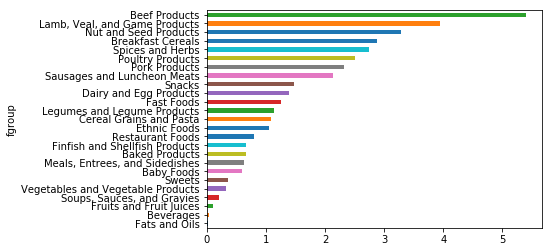

In [49]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [50]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [52]:
get_maximum = lambda x: x.xs(x.value.idxmax())

In [53]:
get_minimum = lambda x: x.xs(x.value.idxmin())

In [54]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [55]:
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

In [56]:
max_foods.food = max_foods.food.str[:50]

In [57]:
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

In [59]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 